In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [7]:
x.head(5)

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [9]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_1'] = X_train['Fare'].fillna(-1)

In [10]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_1,Fare_99,Fare_1
12,20.0,8.050,0,20.0,20.0,8.050,8.050
666,25.0,13.000,0,25.0,25.0,13.000,13.000
583,36.0,40.125,0,36.0,36.0,40.125,40.125
260,NaN,7.750,0,99.0,-1.0,7.750,7.750
683,14.0,46.900,7,14.0,14.0,46.900,46.900


In [12]:
print('age')
print('original',X_train['Age'].var())
print('Age_99 ',X_train['Age_99'].var())
print('Age_1 ',X_train['Age_1'].var())

print('Fare')
print('original',X_train['Fare'].var())
print('Fare_99 ',X_train['Fare_99'].var())
print('Fare_1 ',X_train['Fare_1'].var())

age
original 220.7125508594779
Age_99  941.5449785228908
Age_1  332.94989958675075
Fare
original 2179.2211148474075
Fare_99  2288.1110874195447
Fare_1  2119.1340187237693


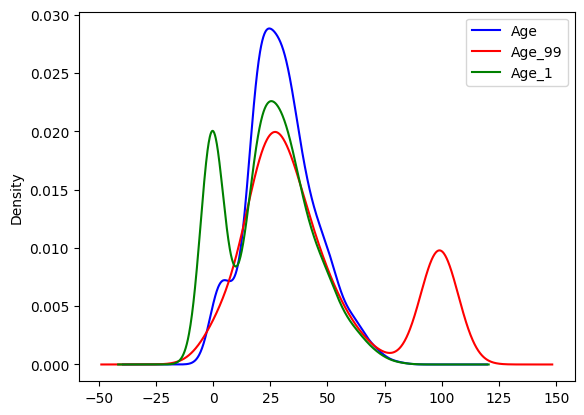

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax , color='blue')
X_train['Age_99'].plot(kind='kde',ax=ax , color='red')
X_train['Age_1'].plot(kind='kde',ax=ax , color='green')

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc='best')

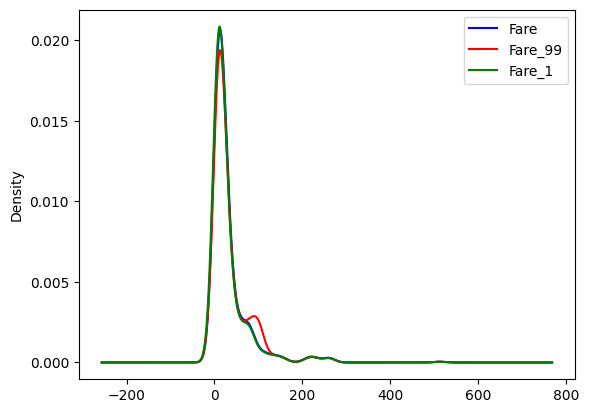

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax , color='blue')
X_train['Fare_99'].plot(kind='kde',ax=ax , color='red')
X_train['Fare_1'].plot(kind='kde',ax=ax , color='green')

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc='best')

In [15]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_1,Fare_99,Fare_1
Age,220.712551,80.290359,-5.974166,220.712551,220.712551,74.978078,76.180801
Fare,80.290359,2179.221115,17.962001,-56.540299,118.220576,2179.221115,2179.221115
Family,-5.974166,17.962001,2.265902,-7.241088,-3.642738,17.309438,16.889078
Age_99,220.712551,-56.540299,-7.241088,941.544979,-170.603507,-70.378747,-45.379628
Age_1,220.712551,118.220576,-3.642738,-170.603507,332.949900,118.731040,108.805461
Fare_99,74.978078,2179.221115,17.309438,-70.378747,118.731040,2288.111087,1956.947116
Fare_1,76.180801,2179.221115,16.889078,-45.379628,108.805461,1956.947116,2119.134019


<Axes: >

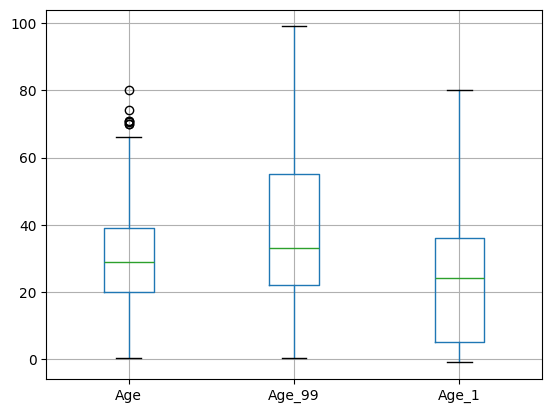

In [16]:
X_train[['Age','Age_99','Age_1']].boxplot()

<Axes: >

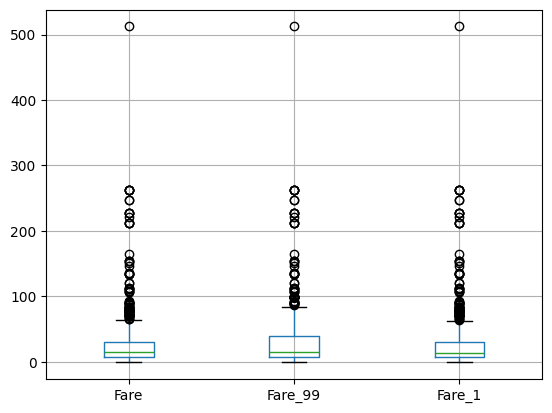

In [17]:
X_train[['Fare','Fare_99','Fare_1']].boxplot()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
imp1 = SimpleImputer(strategy='constant',fill_value=-1)
imp2 = SimpleImputer(strategy='constant', fill_value=99)

In [22]:
trf = ColumnTransformer([
    ('imputer1',imp1,['Age']),
    ('imputer2',imp2,['Fare'])
],remainder='passthrough')

In [23]:
trf.fit(X_train)

/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare'])])

In [24]:
trf.named_transformers_['imputer1'].statistics_

array([-1.])

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([99.])

In [26]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)